In [1]:
#Notebook setup: import statement
import matplotlib.animation as animation
import fenics as fn
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math
from IPython.display import display
from IPython.display import Markdown
from scipy import linalg
from scipy import sparse
import scipy.sparse.linalg
#dependency
# Mat_2D_PDE.png 
#  (created by print-screen+crop matrix picture)

# Partial Differential Equation (PDE)
## We will cover
<b>Partial derivative approximation</b>
* <b>Use Finite Difference Formulas</b>
<p>

<b>Solving PDE with</b>

* <b>Finite Difference</b> (to a certain depth)
* <b>Finite Element</b> (just a quick look)

# Partial derivative approximation
Forward finite difference<p>
$
\dfrac{\partial f(x,y,z)}{\partial z}_{\text{at x,y,z}} \approx \dfrac{f(x,y,z+\varepsilon)-f(x,y,z)}{\varepsilon}
$

https://en.wikipedia.org/wiki/Finite_difference_coefficient<p>
$\text{Forward finite difference formulas (uniform grid spacing)}$
$\begin{array}{ |c|c|ccccc| } 
 \hline
 \text{Derivative} & \text{Accuracy} &  Points \\ 
  &  & 0 & 1& 2& 3& 4& 5\\ 
 \hline
 1 & 1 & -1 & 1 &  &  &  &  \\ 
 1 & 2 & -3/2 &  2 & -1/2 & & & \\ 
 1 & 3 & -11/6 &3&	−3/2&	1/3	\\
 1 & 4 &	−25/12	&4&	−3	&4/3	&−1/4\\
 \hline
2&1&	1	&−2	&1	 	 	 	 	 	 \\
2&2&	2	&−5	&4	&−1	 	 	 	 	 \\
2&3&	35/12	&−26/3	&19/2	&−14/3	&11/12	 	 	\\ 	 
2&4&	15/4	&−77/6	&107/6	&−13	&61/12	&−5/6\\
 \hline
\end{array}$
<p>
For backward difference, give all odd derivative coefficient with the opposite sign.<p>
For backward difference<p>
Point 0 becomes point 0,<br>
Point 1 becomes point -1<br>
Point 2 becomes point -2<br>
Point 3 becomes point -3<br>
and so on, ...<p>
Thus we have<p>

$\text{Backward finite difference formulas (uniform grid spacing)}$
$\begin{array}{ |c|c|ccccc| } 
 \hline
 \text{Derivative} & \text{Accuracy} &  Points \\ 
  &  & 0 & -1& -2& -3& -4& -5\\ 
 \hline
 1 & 1 & 1 & -1 &  &  &  &  \\ 
 1 & 2 & 3/2 &  -2 & 1/2 & & & \\ 
 1 & 3 & 11/6 &3&	3/2&	-1/3	\\
 1 & 4 &	25/12	&-4&	3	&-4/3	&1/4\\
 \hline
2&1&	1	&−2	&1	 	 	 	 	 	 \\
2&2&	2	&−5	&4	&−1	 	 	 	 	 \\
2&3&	35/12	&−26/3	&19/2	&−14/3	&11/12	 	 	\\ 	 
2&4&	15/4	&−77/6	&107/6	&−13	&61/12	&−5/6\\
 \hline
\end{array}$


$\text{Central finite difference formulas (uniform grid spacing)}$
<font size = 1>
$\begin{array}{ |c|c|ccccccccc| } 
 \hline
 \text{Derivative} & \text{Accuracy} &  Points \\ 
  &  & -4 & -3& -2& -1& 0& 1& 2& 3& 4\\ 
 \hline
1&2&	  & 	  & 	 &	−1/2&0&	1/2	 	 	 \\
1&4&	  &	 	  & 1/12 &	−2/3&0&	2/3&−1/12	 	\\ 
1&6&	  &	 −1/60&	3/20 &	−3/4&0&	3/4&−3/20&	1/60 	 \\
1&8& 1/280&	−4/105&	1/5	 &  −4/5&0&	4/5&−1/5 &	4/105&	−1/280 \\
 \hline
2&2&	 	  &	 	 &       &    1&     −2& 1	 	 	 \\
2&4&	 	  &	     &  −1/12&	4/3&   −5/2& 4/3& −1/12	 	 \\
2&6&	 	  & 1/90 &	−3/20&	3/2& −49/18& 3/2& −3/20& 1/90 	 \\
2&8&	−1/560&	8/315&	−1/5 &	8/5&−205/72& 8/5& −1/5 & 8/315&	−1/560 \\
 \hline
\end{array}$
</font>
<p>For the second order derivative, devide the expression (point value * coefficient) by $h^2$

# Type of PDE
* Elliptic - time-independent
* Hyperbolic - time-dependent and wavelike
* Parabolic - time-dependent and diffusive 
* Other types
<font size = 3>
<p>$a \frac{\partial^2 u}{\partial x_1^2} + 2b \frac{\partial^2 u}{\partial x_1\partial x_2} +
    c \frac{\partial^2 u}{\partial x_2^2} + d \frac{\partial u}{\partial x_1} +
    e \frac{\partial u}{\partial x_2} + f u = g$<p>
a,b,c,d,e,f, and g are functions of $x_1$ and $x_2$
</font>

### Elliptic PDE
$b^2 - 4ac < 0$<br>
Example: Poisson's equation (e.g. Gauss's law for electricity)<p>
$\nabla^2 u = f(x)$<p>
Example: Laplace equation (e.g. steady state heat transfer):<p>
$\nabla^2 u = 0$<p>
Solution is smooth, even if IC and BC are rough. One value at BC affect all solution points

### Parabolic PDE
$b^2 - 4ac = 0$<br>
Example: Heat Equation (transient heat conduction in solid)<p>
$\dfrac{\partial u}{\partial t} = \alpha \nabla^2 u$<p>
This gives one-way communication in time (the past impacts the future, but the future does not impact the past)

### Hyperbolic PDE
$b^2 - 4ac > 0$<br>
Example: Wave equation<p>
$\dfrac{\partial^2u}{\partial t^2} = c^2 \dfrac{\partial^2u}{\partial x^2}$<p>
The disturbance in BC cause wave to travel (propagate) at speed C. Not every points feel the disturbance all at once (Elliptic PDE is equivalent to every point feel the disturbance in BC, all at once).

<p>http://mathworld.wolfram.com/EllipticPartialDifferentialEquation.html
<br>https://en.wikipedia.org/wiki/Partial_differential_equation#Equations_of_second_order

# <font color = 000EBB>Finite Difference</font>
## <font color = 016D09>Basic Steps</font>
0) Optional (but suggested) - Non-dimensionalize the PDE<br>
1) Discretize the domain into discrete point in time and space<br>
2) Use finite difference formula transform all partial derivatives into algebraic expressions as a function of point value<br>
3) Arrange all algebraic equations into matrix form<br>
4) Use numerical method in solving system of linear equation to get solution at each point<br>
5) Visualize the solution at time-slice or space-slice<br>


# <font color = 0366FF>Finite Difference formula</font>
How to use wikipedia table
https://en.wikipedia.org/wiki/Finite_difference_coefficient
Approximation can be done in various way, depending on what point in space that is available. In this example, we will solve 1 dimension transient heat transfer copper. For 3 cm 1D copper bar, what will happen if we attach it to a hot heat source (at 50 C), if the copper bar temperature is at 20 C, initially.<p>
$\dfrac{\partial T}{\partial t} = \alpha \dfrac{\partial^2 T}{\partial x^2}$<p>
Initial condition: At $t = 0$, $T = 20,\quad \forall T \in \Omega;\quad \Omega = [0, 0.03]\quad$ 
or $\quad T_i = 20$<br>
Boundary condition1: At $x = 0$ m., $T = 50,\quad \text{at any time}$ $\quad \text{or} \quad T_0 = 50$<p>
Boundary condition2: At $x = 0.03$ m., $\dfrac{\partial T}{\partial x} = 0,\quad \text{at any time}$<p>
Assume no heat loss at $x = 0.03$ m<p>

$T$ is temperature in degree Celsius $[ \,C\, ]$<br>
$T_i$ is the initial temperature<br>
$T_0$ is the temperature at $x = 0$<br>
$x$ is a distance in centimeter [$m$]<br>
$a$ is $x$ at the left boundary<br>
$b$ is $x$ at the right boundary<br>
$\alpha$ is thermal diffusivity of copper [$m^2/s$]<br>
$\alpha = \dfrac{k}{\rho \hat C_p}$<br>
For copper, $\:\alpha = 1.11 \times 10^{-4}\:\: m^2/s$<br>
$t$ is time in second [$s$]

# Step 0: Non-dimentionalize PDE (optional)
The dimensionless PDE form can be used for other question that has the same dimensionless form<p>
Define<p>
$\tilde T = \dfrac{T-T_i}{T_0-T_i}\qquad$ This way, the solution will be in between 0 and 1 (hopefully)<p>
$\tilde x = \dfrac{x - a}{b - a} = \dfrac{x - 0}{0.03 - 0}\quad\text{or}\quad \partial \tilde x = \dfrac{1}{b-a}\partial x$<p>
Thus,<p>
$\dfrac{\partial}{\partial x} = \dfrac{1}{b-a}\dfrac{\partial}{\partial \tilde x}$<p>
Then, we have<p>
$\dfrac{\partial \tilde T}{\partial t} = \dfrac{1}{T_0-T_i}\dfrac{\partial T}{\partial t}$<p>
$\dfrac{\partial \tilde T}{\partial \tilde x} = \dfrac{\partial \tilde T}{\partial x}\dfrac{\partial x}{\partial \tilde x} = \dfrac{b-a}{T_0-T_i}\dfrac{\partial T}{\partial x}$<p>

$\dfrac{\partial}{\partial \tilde x}\dfrac{\partial \tilde T}{\partial \tilde x} = \dfrac{\partial}{\partial \tilde x} \dfrac{b-a}{T_0-T_i}\dfrac{\partial T}{\partial x}
= \dfrac{(b-a)^2}{T_0-T_i}\dfrac{\partial^2 T}{\partial x^2}$<p>
Substitute the dimensionless form, we have<p>
$(T_0-T_i)\dfrac{\partial \tilde T}{\partial t} = \dfrac{\partial  T}{\partial t}$ $\quad\text{and}\quad$ 
$\dfrac{T_0-T_i}{(b-a)^2}  \dfrac{\partial^2 \tilde T}{\partial \tilde x^2} = \dfrac{\partial^2 T}{\partial x^2}$<p>
Substitute the above expressions into the governing equation, we have<p>
$(T_0-T_i)\dfrac{\partial \tilde T}{\partial t} = \alpha \dfrac{T_0-T_i}{(b-a)^2}  \dfrac{\partial^2 \tilde T}{\partial \tilde x^2}\quad\text{or}$<p>
$\dfrac{(b-a)^2}{\alpha} \dfrac{\partial \tilde T}{\partial t} =    \dfrac{\partial^2 \tilde T}{\partial \tilde x^2}$<p>
By defining the dimensionless time as,<p>
$\tilde t = \dfrac{\alpha}{(b-a)^2} t$<p>
We have,<p>
$\dfrac{\partial \tilde T}{\partial \tilde t} =    \dfrac{\partial^2 \tilde T}{\partial \tilde x^2}$<p>


With the dimensionless form, the boundary conditions become,<p>
At $x = 0,\:\: \tilde x = 0, \:\:T = T_0 \quad\text{or}\quad \tilde T = 1$<p>
At $x = b,\:\: \tilde x = 1, \:\: \dfrac{\partial T}{\partial x} = 0 \quad\text{or}\quad \dfrac{\partial \tilde T}{\partial \tilde x} = 0$<p>
The dimensionless initial condition becomes,<p>
$\tilde T = 0\quad\text{at}\quad \tilde t = 0$

# Step 1: PDE approximation
$\dfrac{\partial \tilde T}{\partial \tilde t} \approx
\dfrac{\tilde T_{n+1} - T_{n}}{\Delta t}\quad$ This is a forward difference in time (first order approximation).<p>
What if we want a better approximation? like second order approximation, what shall we do? <b>Directly use finite difference  table with higher order may not be a good idea.</b><p>

A better way of doing this is to use the numerical scheme that is proven to work.

# Step 1: Strategy
The difficulty is not about using the finite difference table. The difficulty comes when we want to rearrange all equation together.

If we use forward scheme in time, this is explicit scheme and it will not be stable (need small step according to CFL condition)<p>

https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition

For explicit scheme in time, we can directly calculate T at the next time, but it won't be stable (can be accurate). For implicit scheme, we need equation for everypoints then solved the point that are linked together simultaneously.

## Forward scheme in time and central scheme in space
Let $i$ be an index for space and $n$ be an index for time, we have<p>
$\dfrac{\partial \tilde T}{\partial \tilde t} \approx
\dfrac{\tilde T_{n+1} - T_{n}}{\Delta \tilde t} \Bigg \vert_{@ i}$

$\dfrac{\partial^2 \tilde T}{\partial \tilde x^2} \approx 
\dfrac{T_{i-1} - 2 T_{i} + T_{i+1}}{(\Delta \tilde x)^2} \Bigg \vert_{@ n}
$
<p> Forward scheme it time means that everything else is defined at the old time step

### Rearranging
We have,
<p>$
\dfrac{\tilde T_{n+1} - \tilde T_{n}}{\Delta \tilde t} \Bigg \vert_{@ i} = \dfrac{\tilde T_{i-1} - 2 \tilde T_{i} + \tilde T_{i+1}}{(\Delta \tilde x)^2} \Bigg \vert_{@ n}$

$\tilde T_{n+1} = \left(\tilde T_i + \Delta \tilde t \dfrac{\tilde T_{i-1} - 2 \tilde T_{i} +\tilde T_{i+1}}{(\Delta \tilde x)^2} \right) \Bigg \vert_{@ n}$

$\tilde T_{n+1}\Bigg\vert_{@i} =\left( \dfrac{\Delta \tilde t}{(\Delta \tilde x)^2}\tilde T_{i-1} + \left(1-\dfrac{2\Delta \tilde t}{(\Delta \tilde x)^2}\right) \tilde T_i + \dfrac{\Delta \tilde t}{(\Delta \tilde x)^2}\tilde T_{i+1}\right)\Bigg \vert_{@n}$

Notice that we can calculate the Temperature at the next time-step right away if we know the temperature at the current time-step

## Boundary Condition
### Dirichlet Boundary Condition
Constant T boundary condition<br>
At $\tilde x = 0$, we have, $\tilde T = 1$
<br>Thus, we have $T_{i=0} = 1$ at every $n$
### Neumann Boundary Condition
Constant flux at the boundary<p>
At $\tilde x = 1, \quad \dfrac{\partial \tilde T}{\partial \tilde x} = 0$<p>
From backward scheme, we have,<p>
$\dfrac{-\tilde T_{B-1} + \tilde T_{B}}{\tilde x} = 0$<p>
or $\tilde T_{B-1} = \tilde T_{B}$ where $B$ is the point on the right boundary

### CFL Condition (Courant-Friedrichs-Lewy Condition)
CFL condition is necessary but not sufficient for the convergence, meaning that even if the step size satisfies CFL condition, it can be still unstable<p>
For heat equation: CFL Condition becomes<p>

$\dfrac{\Delta \tilde t}{(\Delta \tilde x)^2}<C$ With C = 1, get unstable result, let's use C = 0.5

https://webcourse.cs.technion.ac.il/236861/Winter2007-2008/ho/WCFiles/numerical_schemes.pdf
<br>
https://en.wikipedia.org/wiki/Talk%3ACourant%E2%80%93Friedrichs%E2%80%93Lewy_condition
<br>
https://people.maths.ox.ac.uk/trefethen/4all.pdf
This means that if the space step-size is small, the time step-size must be small too, so that CFL condition holds. In our case we select, <p>
$\Delta \tilde x = 0.1 \quad \text{and} \quad \Delta \tilde t = 0.0045$

$\tilde T_{n+1}\Bigg\vert_{@i} =\left( \dfrac{\Delta \tilde t}{(\Delta \tilde x)^2}\tilde T_{i-1} + \left(1-\dfrac{2\Delta \tilde t}{(\Delta \tilde x)^2}\right) \tilde T_i + \dfrac{\Delta \tilde t}{(\Delta \tilde x)^2}\tilde T_{i+1}\right)\Bigg \vert_{@n}$

$\tilde T_{n+1}\Bigg\vert_{@i} =\left( r \tilde T_{i-1} + \left(1-2r\right) \tilde T_i + r\tilde T_{i+1}\right)\Bigg \vert_{@n}$

In [2]:
def forward_heat(i,row,dt,dx):
    #row is the whole row
    #i is the location the calculat T @ n+1
    r = dt/dx**2
    T_np1 =  (r * row[i-1] + (1 - 2*r) * row[i]
              + r * row[i+1])
    return T_np1

def cal_heat_forward():
    #Initialize domain x with 11 point, 10 section interval of 1
    dt = 0.009/2
    dx = 0.1
    tt = np.arange(0,2,dt)
    xx = np.linspace(0,1,11)

    Nx = xx.shape[0]
    #Data in each row is the data at the same time step
    TT = np.empty([tt.shape[0],xx.shape[0]])
    #specify the initial condition
    TT[0,:] = 0
    #specify the BC
    TT[0,0] = 1

    for j in range(1, tt.shape[0]):
        body = np.array([forward_heat(i,TT[j-1,:],dt,dx) 
                         for i in range(1,Nx-1)])
        left_bc = np.array([1])
        right_bc = np.array([body[-1]])
        next_T = np.r_[left_bc, body, right_bc]
        #np.r_[] work just like append for 1D array
        TT[j,:] = next_T
    return TT, xx, tt
TT, xx, tt = cal_heat_forward()

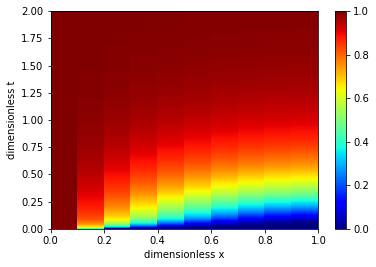

In [3]:
xx_m, tt_m = np.meshgrid(xx,tt)
plt.figure()
plt.pcolor(xx_m,tt_m,TT, cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.colorbar()
plt.show()

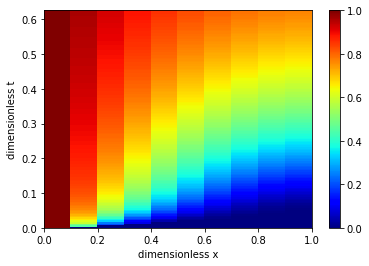

In [4]:
plt.figure()
plt.pcolor(xx_m[0:140,:],tt_m[0:140,:],TT[0:140,:], cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.colorbar()
plt.show()

## Obtaining the dimensional result
For copper, $\:\alpha = 1.11 \times 10^{-4}\:\: m^2/s$<br>
$\tilde t = \dfrac{1.11 \times 10^{-4}}{(0.03)^2} t$<p>
$\tilde x = \dfrac{x - a}{b - a} = \dfrac{x}{0.03}$<p>
$\tilde T = \dfrac{T-T_i}{T_0-T_i} = \dfrac{T-20}{50-20}$

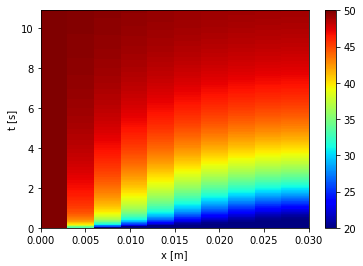

In [5]:
tt_m_d = tt_m * 0.03**2 / 1.11e-4
xx_m_d = xx_m * 0.03
TT_d = TT * 30 + 20
plt.figure()
plt.pcolor(xx_m_d[0:300,:],tt_m_d[0:300,:]
           ,TT_d[0:300,:], cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('t [s]')
plt.colorbar()
plt.show()

In [6]:
30*.9 + 20

47.0

In [7]:
np.where(TT_d[:,-1] > 47)[0][0]

206

In [8]:
TT_d[205:210,-1]

array([ 46.98032966,  47.01739559,  47.05400654,  47.0901681 ,  47.12588578])

In [9]:
tt_m_d[206][0]

7.5162162162162156

At about 7.5 second, T of the right edge reach 90% of the maximum possible temperature increment

# More stable method
This allows us to use a smaller space step without doing too small time step size
## Backward finite difference in time
This require solving system of linear equations (equations from all points that are at the same time steps) to get the next time step temperature data.

$\dfrac{\partial \tilde T}{\partial \tilde t} \approx
\dfrac{\tilde T_{n+1} - \tilde  T_{n}}{\Delta \tilde t} \Bigg \vert_{@ i}$

$\dfrac{\partial^2 \tilde T}{\partial \tilde x^2} \approx 
\dfrac{\tilde T_{i-1} - 2 \tilde T_{i} + \tilde T_{i+1}}{(\Delta \tilde x)^2} \Bigg \vert_{@ n+1}
$

$\dfrac{\tilde T_{n+1} - \tilde T_{n}}{\Delta \tilde t} \Bigg \vert_{@ i} =
\dfrac{\tilde T_{i-1} - 2 \tilde T_{i} + T_{i+1}}{(\Delta \tilde x)^2} \Bigg \vert_{@ n+1}
$

$ \left(-r\tilde T_{i-1} + (1+2r) \tilde T_i -r\tilde T_{i+1} \right)_{n+1}= \left(\tilde T_{i}\right)_{n} $ <p>
$ \left(-r\tilde T_{i-1} + q \tilde T_i -r\tilde T_{i+1} \right)_{n+1}= \left(\tilde T_{i}\right)_{n} $
<p>where $r = \dfrac{\Delta \tilde t}{(\Delta \tilde x)^2}$ and $q = 1+2r$
<p>BC: at $x = 0,\quad \tilde T = 1$ (Dirichlet BC)
<p>BC: at $x = 0,\quad \tilde T_{mx} = \tilde T_{mx-1}$ (Backward - Neumann BC)

# Matrix form of the discretized equations

$\underbrace{
\begin{matrix}
\tilde T_0 & & & & & &\\
-r \tilde T_0 & +q\tilde T_1 & -r \tilde T_2 & & & &\\
 & -r \tilde T_1 & +q \tilde T_2 & -r \tilde T_3 & & &\\
 & & -r \tilde T_2 & +q \tilde T_3 & -r \tilde T_4 &&\\
 & & & \ddots & \ddots & \ddots  &\\
  & & && -r \tilde T_{mx-2} & +q \tilde T_{mx-1} & -r \tilde T_{mx}\\
   && & &&  -\tilde T_{mx-1} & +\tilde T_{mx}\\
\end{matrix}}_{at \:\, n+1}
\begin{matrix}
=& 1\\
=& \tilde T_{1n}\\
=& \tilde T_{2n}\\
=& \tilde T_{3n}\\
=& \vdots \\
=& \tilde T_{mx-1,n}\\
=& 0\\
\end{matrix}
$

$
\begin{bmatrix}
1 & & & & & &\\
-r & q& -r & & & &\\
 & -r & q& -r& & &\\
 & & -r & q& -r&&\\
 & & & \ddots & \ddots & \ddots  &\\
  & & && -r& q& -r\\
   && & &&  -1 & 1\\
\end{bmatrix}
\underbrace{
\begin{bmatrix}
\tilde T_0\\
\tilde T_1\\
\tilde T_2\\
\tilde T_3\\
\vdots\\
\tilde T_{mx-1}\\
\tilde T_{mx}\\
\end{bmatrix}}_{at \: n+1}
=
\begin{bmatrix}
1\\
\tilde T_{1n}\\
\tilde T_{2n}\\
\tilde T_{3n}\\
\vdots\\
\tilde T_{mx-1,n}\\
0\\
\end{bmatrix}
$<p>Number of point in x-space is $Nx$ points or 0 to $m$<br>
<p>Now, our linear system is in the form<br>
$Ax = b$
<p>Notice that we can create the coefficient matrix just once.<br>
Then, we use LU decomposition of the coefficient matrix<br>
Use forward and backward substitution to solve for T at the next time step<br>
Update the current time step to be the next time step<br>
Redo the forward/backward substitution process (no need to redo the decomposition process)
<p>
<b>Please note that we should not use LU decomposition</b>, but we should use Thomas Algorithm instead (this will be more efficient and faster). Yet, this is for either homework or exam.

## Solving the backward finite difference scheme

In [10]:
def cal_heat_backward():
    #specify the number of points
    Nx = 51
    Nt = 101
    #initialize space and time grids
    x = np.linspace(0,1,Nx)
    t = np.linspace(0,2,Nt)
    #calculate dx and dt
    dx = x[1]-x[0]
    dt = t[1]-t[0]
    #make empty output matrix (row = t, col = x)
    TT = np.empty([Nt,Nx])
    TT[0,:] = np.linspace(0,0,Nx)
    r = dt/dx**2
    q = 1+2*r

    mid_dia = [1]+[q for i in range(Nx-2)]+[1]
    up_dia = [0] +[-r for i in range(Nx-2)]
    lw_dia = [-r for i in range(Nx-2)] + [-1]
    mat_A = sparse.diags([mid_dia,up_dia,lw_dia],[0,1,-1])
    lu,piv = linalg.lu_factor(mat_A.todense())
    #create coefficient matrix once and do LU decomposition
    for j in range(1,Nt):
        mat_B = TT[j-1,:].copy()
        mat_B[0] = 1
        mat_B[-1] = 0
        #cheaply do forward and backward substitution
        TT[j,:] = linalg.lu_solve((lu,piv),mat_B)
    return TT, x, t
TT2, x2, t2 = cal_heat_backward()

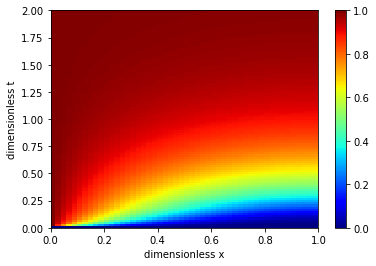

In [11]:
xx_m2, tt_m2 = np.meshgrid(x2,t2)
plt.figure()
plt.pcolor(xx_m2,tt_m2,TT2, cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.colorbar()
plt.show()

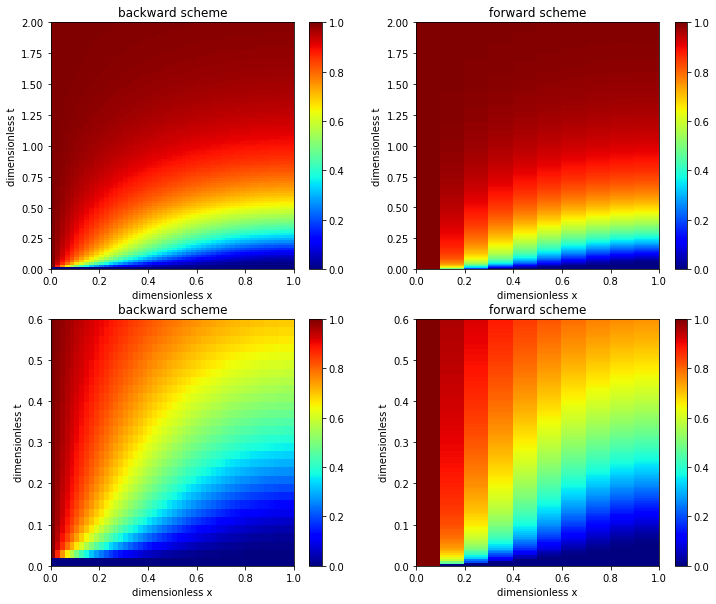

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.pcolor(xx_m2,tt_m2,TT2, cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.title('backward scheme')
plt.colorbar()

plt.subplot(222)
plt.pcolor(xx_m,tt_m,TT, cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.title('forward scheme')
plt.colorbar()

plt.subplot(223)
plt.pcolor(xx_m2,tt_m2,TT2, cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.title('backward scheme')
plt.ylim(0,0.6)
plt.colorbar()

plt.subplot(224)
plt.pcolor(xx_m,tt_m,TT, cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.title('forward scheme')
plt.ylim(0,0.6)
plt.colorbar()
plt.show()

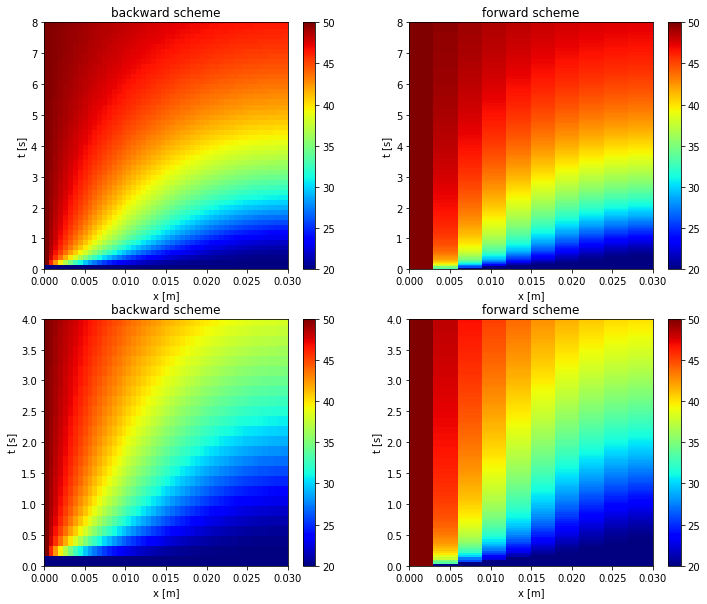

In [13]:
tt_m_d2 = tt_m2 * 0.03**2 / 1.11e-4
xx_m_d2 = xx_m2 * 0.03
TT_d2 = TT2 * 30 + 20
plt.figure(figsize = (12,10))

plt.subplot(221)
plt.pcolor(xx_m_d2,tt_m_d2
           ,TT_d2, cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('t [s]')
plt.ylim(0,8)
plt.title('backward scheme')
plt.colorbar()

plt.subplot(222)
plt.pcolor(xx_m_d,tt_m_d
           ,TT_d, cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('t [s]')
plt.ylim(0,8)
plt.title('forward scheme')
plt.colorbar()

plt.subplot(223)
plt.pcolor(xx_m_d2,tt_m_d2
           ,TT_d2, cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('t [s]')
plt.ylim(0,4)
plt.title('backward scheme')
plt.colorbar()

plt.subplot(224)
plt.pcolor(xx_m_d,tt_m_d
           ,TT_d, cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('t [s]')
plt.ylim(0,4)
plt.title('forward scheme')
plt.colorbar()


plt.show()

In [14]:
#CFL number for backward scheme case
dx2 = x2[1] - x2[0]
dt2 = t2[1] - t2[0]
dt2/dx2**2

50.0

In [15]:
#CFL = 50 >> 0.5
#We get more accuracy along x-axis
#Without the need to move slow!

# Better Accuracy Scheme
We can get a better accuracy by using Crank-Nicolson method (second order in time). Forward and backward scheme are first order in time. Central scheme for $\frac{\partial^2 T}{\partial x^2}$ is second order accuracy in space.
<p>https://en.wikipedia.org/wiki/Finite_difference_method#Accuracy_and_order
<br>https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method
<p>Roughly speaking, Crank-Nicolson method is the average between forward and backward scheme.<p>

We are free to use any combination of the scheme shown in the Finite Difference Coefficient Table. However, it could be somewhat lengthly to get the matrix form.

## Second order in time and space
Be aware that the combination of methods cause the overall accuracy to be at the lowest accuracy of the method being used.  Thus, if we use first order backward difference to get point at $t_1$, and use second order backward difference to get point at $t_2$ and the rest of the domain. Then, using second order later on, does not help much. The accuracy in time is still the first order (because we use the first order method first).<p>
This means that if we really need second order in both time and space, we need to use second order scheme everywhere including the boundary condition!

# Crank-Nicolson (second order in time)

<font face = 'monospace'>
i-1,n+1-------i,n+1-------i+1,n+1<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|<br>
i-1,n----------i,n--------i+1,n
</font>
<br>
<br>
We need 3 points in the current time step (i-1, i, i+1)@ {n+1} and another 3 points in the previous time step (i-1, i, i+1)@ {n} to get the equation for the point at i,{n+1}. Crank-Nicolson is unconditionally stable, but can contain some <b>oscillation</b> if $\dfrac{\alpha \Delta t}{(\Delta x)^2} > 0.5$
<br>

$\frac{u_{i}^{n + 1} - u_{i}^{n}}{\Delta t} = 
F_{i}^{n}\left(u,\, x,\, t,\, \frac{\partial u}{\partial x},\, \frac{\partial^2 u}{\partial x^2}\right) \qquad \mbox{(forward Euler)}$

$\frac{u_{i}^{n + 1} - u_{i}^{n}}{\Delta t} = 
F_{i}^{n + 1}\left(u,\, x,\, t,\, \frac{\partial u}{\partial x},\, \frac{\partial^2 u}{\partial x^2}\right) \qquad \mbox{(backward Euler)}$

$\frac{u_{i}^{n + 1} - u_{i}^{n}}{\Delta t} = 
\frac{1}{2}\left[
F_{i}^{n + 1}\left(u,\, x,\, t,\, \frac{\partial u}{\partial x},\, \frac{\partial^2 u}{\partial x^2}\right) + 
F_{i}^{n}\left(u,\, x,\, t,\, \frac{\partial u}{\partial x},\, \frac{\partial^2 u}{\partial x^2}\right)
\right] \quad \mbox{(Crank--Nicolson)}.$

$\dfrac{\partial u}{\partial t} = \alpha \dfrac{\partial^2 u}{\partial x^2}$<p>
$\dfrac{u_{i}^{n + 1} - u_{i}^{n}}{\Delta t} = \dfrac{\alpha}{2 (\Delta x)^2}\left(
(u_{i + 1}^{n + 1} - 2 u_{i}^{n + 1} + u_{i - 1}^{n + 1}) + 
(u_{i + 1}^{n} - 2 u_{i}^{n} + u_{i - 1}^{n})
\right)$

For our dimensionless PDE, dropping ~ sign and $\alpha$, we have

$T_{i}^{n + 1} - T_{i}^{n} = r \left(
(T_{i + 1}^{n + 1} - 2 T_{i}^{n + 1} + T_{i - 1}^{n + 1}) + 
(T_{i + 1}^{n} - 2 T_{i}^{n} + T_{i - 1}^{n})
\right)$
<p>where $\quad r = \dfrac{\Delta t}{2(\Delta x)^2}$

$\left(-r T_{i-1} + (1+2r) T_i - r T_{i+1}\right)_{n+1} = \left(r T_{i-1} + (1-2r)T_i + r T_{i+1}\right)_n$

For $q = 1+2r\quad\text{and}\quad p = 1-2r$ <p>
We have <p>
$\left(-r T_{i-1} + q T_i - r T_{i+1}\right)_{n+1} = \left(r T_{i-1} + p T_i + r T_{i+1}\right)_n$ <p>
This time, we also need 2nd order at the Neumann boundary condition.
<p>
Right BC: <p>
$0 = \dfrac{1.5 T_{mx} - 2 T_{mx-1} + 0.5 T_{mx-2}}{\Delta x}_{@n}
$

<font size = 1>
$
\begin{bmatrix}
1 & & & & & &\\
-r & q& -r & & & &\\
 & -r & q& -r& & &\\
 & & -r & q& -r&&\\
 & & & \ddots & \ddots & \ddots  &\\
  & & && -r& q& -r\\
   && & &0.5&  -2 & 1.5\\
\end{bmatrix}
\underbrace{
\begin{bmatrix}
T_0\\
T_1\\
T_2\\
T_3\\
\vdots\\
T_{mx-1}\\
T_{mx}\\
\end{bmatrix}}_{at \: n+1}
=
\begin{bmatrix}
1 & & & & & &\\
r & p& r & & & &\\
 & r & p& r& & &\\
 & & r & p& r&&\\
 & & & \ddots & \ddots & \ddots  &\\
  & & && r& p& r\\
  0 &\cdots& & &&\cdots & 0\\
\end{bmatrix}
\underbrace{
\begin{bmatrix}
1\\
T_1\\
T_2\\
T_3\\
\vdots\\
T_{mx-1}\\
T_{mx}\\
\end{bmatrix}}_{at \: n}$
</font>

In [16]:
def cal_heat_Crank_Nicolson(Nx = 11, Nt = 101):
    #initialize space and time grids
    x = np.linspace(0,1,Nx)
    t = np.linspace(0,2,Nt)
    #calculate dx and dt
    dx = x[1]-x[0]
    dt = t[1]-t[0]
    #make empty output matrix (row = t, col = x)
    TT = np.empty([Nt,Nx])
    TT[0,:] = np.linspace(0,0,Nx)
    r = 0.5*dt/dx**2
    q = 1+2*r
    p = 1-2*r
    mid_dia = [1]+[q for i in range(Nx-2)]+[1.5]
    up_dia = [0] +[-r for i in range(Nx-2)]
    lw_dia = [-r for i in range(Nx-2)] + [-2]
    lw2_dia = [0 for i in range(Nx-3)] + [0.5]
    mat_A = sparse.diags([mid_dia,up_dia,lw_dia,lw2_dia],[0,1,-1,-2])
    mat_A = mat_A.tocsc()
    #creating part of the rhs
    mid_diaB =[1]+[p for i in range(Nx-2)]+[0]
    up_diaB = [0]+[r for i in range(Nx-2)]
    lw_diaB = [r for i in range(Nx-2)] + [0]
    mat_B1 = sparse.diags([mid_diaB,up_diaB,lw_diaB],[0,1,-1])
    #create sparse LU which has method solve
    splu_obj = sparse.linalg.splu(mat_A)

    for j in range(1,Nt):
        mat_B2 = TT[j-1,:].copy()
        mat_B2[0] = 1
        mat_B = mat_B1.dot(mat_B2)
        TT[j,:] = splu_obj.solve(mat_B)
    return TT, x, t
TT3, x3, t3 = cal_heat_Crank_Nicolson()

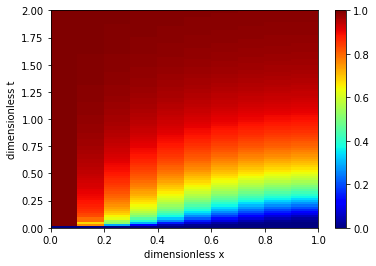

In [17]:
xx_m3, tt_m3 = np.meshgrid(x3,t3)
plt.figure()
plt.pcolor(xx_m3,tt_m3,TT3, cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.colorbar()
plt.show()

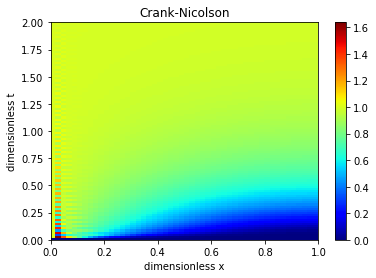

In [18]:
TT4, x4, t4 = cal_heat_Crank_Nicolson(Nx = 51, Nt = 101)
xx_m4, tt_m4 = np.meshgrid(x4,t4)
plt.figure()
plt.pcolor(xx_m4,tt_m4,TT4, cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.title('Crank-Nicolson')
plt.colorbar()
plt.show()

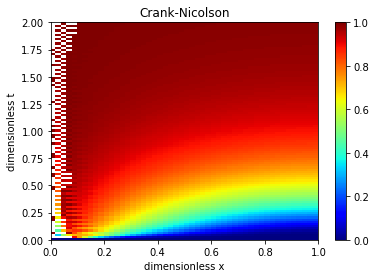

In [19]:
plt.figure()
a = plt.pcolor(xx_m4,tt_m4,TT4, cmap='jet', vmin = 0, vmax = 1)
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.title('Crank-Nicolson')
a.cmap.set_over('white')
a.cmap.set_under('black')
plt.colorbar()
plt.show()

In [20]:
#oscillation of the answer near the boundary
TT4[:,0:4]

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  1.63800498,  1.34153015,  1.09871653],
       [ 1.        ,  0.32597521,  0.53394902,  0.65595839],
       [ 1.        ,  1.50906716,  1.18345939,  0.96979648],
       [ 1.        ,  0.45686579,  0.70631846,  0.82474063],
       [ 1.        ,  1.42649262,  1.09918343,  0.91861935],
       [ 1.        ,  0.54090075,  0.80017962,  0.90075324],
       [ 1.        ,  1.36622069,  1.04707605,  0.89651252],
       [ 1.        ,  0.60248317,  0.85978216,  0.94100829],
       [ 1.        ,  1.31941996,  1.01270156,  0.8881728 ],
       [ 1.        ,  0.65066972,  0.90072778,  0.96411725],
       [ 1.        ,  1.28175139,  0.98935769,  0.88717779],
       [ 1.        ,  0.68989844,  0.93026785,  0.97805987],
       [ 1.        ,  1.25068704,  0.97333465,  0.89028232],
       [ 1.        ,  0.72267841,  0.9522759 ,  0.98673099],
       [ 1.        ,  1.22459824,  0.96235421,  0.89565571],
       [ 1.        ,  0.

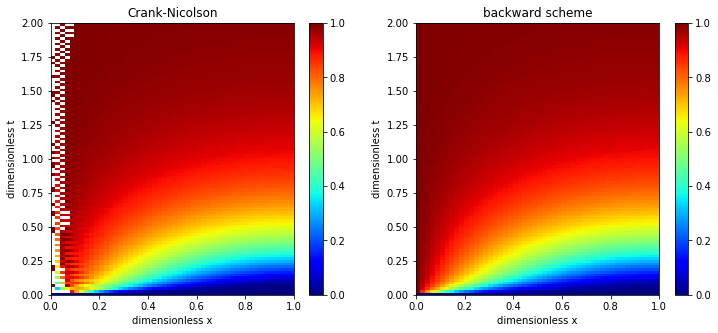

In [21]:
plt.figure(figsize = (12,5))

plt.subplot(121)
a = plt.pcolor(xx_m4,tt_m4,TT4, cmap='jet', vmin = 0, vmax = 1)
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.title('Crank-Nicolson')
a.cmap.set_over('white')
a.cmap.set_under('black')
plt.colorbar()

plt.subplot(122)
plt.pcolor(xx_m2,tt_m2,TT2, cmap='jet')
plt.xlabel('dimensionless x')
plt.ylabel('dimensionless t')
plt.title('backward scheme')
plt.colorbar()
plt.show()

In [22]:
#you may try to estimate the slope at T_i by
#using the weighted average of the slope at T_{i-1}
# and T_{i+1}. The weight can be 1 4 1 (as in RK4 case)

# 2D Transient Heat Transfer
### Mass/Thermal diffusion in 2 D space
<p>
$\dfrac{\partial \tilde T}{\partial \tilde t} = \nabla^2 \tilde T$


By dropping the ~ sign,
$\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2} + \dfrac{\partial^2 T}{\partial y^2}$<p>
Domain $\Omega = [0,1]\times[0,1]$<p>
Initial condition: at t = 0, T = 0 everywhere but T = 1 at (0.5,0.5)<p>
Boundary condition: no mass transfer at the boundary ($\dfrac{\partial \:\:}{\partial k} = 0$ on k boundary)

Discretized form:<p>

$\dfrac{\partial^2 T}{\partial x^2} \approx 
\dfrac{T_{i-1} - 2 T_{i} + T_{i+1}}{(\Delta x)^2}$<p>

$\dfrac{\partial^2 T}{\partial y^2} \approx 
\dfrac{T_{j-1} - 2 T_{j} + T_{j+1}}{(\Delta y)^2}$<p>
Substituting the finite difference approximation into the governing equation, we have<p>
Use backward scheme in time<p>
$\dfrac{T_{n+1}-T_{n}}{\Delta t}_{i,j} = \dfrac{T_{i-1} - 2 T_{i} + T_{i+1}}{(\Delta x)^2}_{j,n+1}+
\dfrac{T_{j-1} - 2 T_{j} + T_{j+1}}{(\Delta y)^2}_{i,n+1}$<p>

Let $\Delta y = \Delta x$<p>
We have, <p>
$(T_{n+1}-T_{n})_{i,j} = r (T_{i-1} - 2 T_{i} + T_{i+1})_{j,n+1}+
r(T_{j-1} - 2 T_{j} + T_{j+1})_{i,n+1}$<p>
where $r = \dfrac{\Delta t}{(\Delta x)^2} = \dfrac{\Delta t}{(\Delta y)^2}$

Rearranging (put n on rhs, n+1 on lhs), we have<p>
$
\underbrace{
(1+4r)T_{i,j}-r T_{i-1,j} - r T_{i+1,j} - r T_{i,j-1} - r T_{i,j+1}}_{n+1} = \underbrace{ T_{i,j} }_{n}
$

By defining $q = 1+4r$, we have<p>
$
\underbrace{
qT_{i,j}-r T_{i-1,j} - r T_{i+1,j} - r T_{i,j-1} - r T_{i,j+1}}_{n+1} = \underbrace{ T_{i,j} }_{n}
$

## Boundary condition:<p>
$\dfrac{\partial T}{\partial x}_{x = 0} = 0 \quad\text{or}\quad
T_{0,j} = T_{1,j}
$<p>
$\dfrac{\partial T}{\partial x}_{x = 1} = 0 \quad\text{or}\quad
T_{N,j} = T_{N-1,j}$<p>
$\dfrac{\partial T}{\partial y}_{y = 0} = 0 \quad\text{or}\quad
T_{i,0} = T_{i,1}$<p>
$\dfrac{\partial T}{\partial y}_{y = 1} = 0 \quad\text{or}\quad
T_{i,N} = T_{i,N-1}$<p>
Notice that he equation in the boundary node does not fully link all cell together. Thus, we do not need equation for the corner points.

In matrix form, we have<p>

NxN * Nx1 = Nx1<p>
We have N point in each dimension (point 0 to point m)<p>
In the block form, we have the boundary conditions at $y = 0$ and $y = m$ as,
<font size = 2>
$\begin{bmatrix}
\vec A_{00} & \vec A_{01} &  &  &  &  & \\
  &   &  &  &  &  & \\
  &   &  &  &  &  & \\
  &   &  &  &  &  & \\
  &   &  &  &  &  & \\
  &   &  &  &  &  & \\
  &   &  &  &  & \vec A_{m,m-1}  & \vec A_{m,m} \\  
\end{bmatrix}$
$\begin{bmatrix}
\vec T_{i,j = 0}\\
\vec T_{i,j = 1}\\
\vec T_{i,j = 2}\\
\vdots \\
\vec T_{i,j = m-2}\\
\vec T_{i,j = m-1}\\
\vec T_{i,j = m}\\
\end{bmatrix}$
$=$
$\begin{bmatrix}
\vec B_{i,j = 0}\\
\vec B_{i,j = 1}\\
\vec B_{i,j = 2}\\
\vdots \\
\vec B_{i,j = m-2}\\
\vec B_{i,j = m-1}\\
\vec B_{i,j = m}\\
\end{bmatrix}$
</font>
<p> or <p>
$\vec {\vec A} \vec {\vec T} = \vec {\vec B}$

### For Neumann boundary condition at $y=0$<p>
$T_{i,j=0} - T_{i,j=1} = 0$
<p>
In matrix form, we have
<p>
$\vec T_{i,j=0} = \begin{bmatrix}
T_{1,0}\\
\vdots \\
T_{m-1,0}\\
\end{bmatrix}$ 
$\text{,} \:$
$\vec T_{i,j=1} = \begin{bmatrix}
T_{0,1}\\
T_{1,1}\\
\vdots \\
T_{m-1,1}\\
T_{m,1}\\
\end{bmatrix}$ 
$\text{,} \:$
$\vec A_{00} =
\begin{bmatrix}
1 &      &      \\
 &     \ddots     &  \\
 &      &     1 \\
\end{bmatrix}
$
$\text{,} \:$
$\vec A_{01} =
\begin{bmatrix}
0&-1 &     &     &0\\
\vdots& &    \ddots    &  &\vdots\\
0& &     &    -1 &0\\
\end{bmatrix}
$
$\text{,} \:$
$\vec b_{i,j=0} = \begin{bmatrix}
0\\
0\\
\vdots \\
0\\
0\\
\end{bmatrix}$ <p>
Notice that at j = 0, we do not have equation for the cornor points.

### For Neumann boundary condition at y = 1, we have, <p>
$T_{i,j = m-1} - T_{i,j = m} = 0$<p>
In matrix form, we have<p>
$\vec T_{i,j=m-1} = \begin{bmatrix}
T_{0,m-1}\\
T_{1,m-1}\\
\vdots \\
T_{m-1,m-1}\\
T_{m,m-1}\\
\end{bmatrix}$ 
$\text{,} \:$
$\vec T_{i,j=N} = \begin{bmatrix}
T_{1,m}\\
\vdots \\
T_{m-1,m}\\
\end{bmatrix}$ 
$\text{,} \:$
$\vec A_{m,m-1} =
\begin{bmatrix}
0&1 &      &  & 0    \\
\vdots& & \ddots & &\vdots \\
0& &      &     1 &0 \\
\end{bmatrix}
$
$\text{,} \:$
$\vec A_{m,m} =
\begin{bmatrix}
-1 &     &     \\
 &    \ddots    &  \\
 &     &    -1 \\
\end{bmatrix}
$
$\text{,} \:$
$\vec b_{i,j=m} = \begin{bmatrix}
0\\
0\\
\vdots \\
0\\
0\\
\end{bmatrix}$ 
<p>Notice that at $j = m$ we do not have cornor points in the calculation

### For Neumann boundary condition at x = 0, we have,<p>
$T_{i=0,j} - T_{i=1,j} = 0$<p>
In matrix form, we have<p>
$T_{i=\{0,1\},j}$ in $\vec{\vec T}$ are 
$ \begin{bmatrix}
T_{0,0}\\
T_{1,0}\\
\text{skip N-2 terms}\\
T_{0,1}\\
T_{1,1}\\
\text{skip N-2 terms}\\
T_{0,2}\\
T_{1,2}\\
\text{skip N-2 terms}\\
T_{0,3}\\
T_{1,3}\\
\vdots \\
\text{repeat periodically}\\
\vdots\\
T_{0,m}\\
T_{1,m}
\end{bmatrix}$ 

$\begin{bmatrix}
0&   &  &  &  &  & \\
  & \begin{bmatrix} 1,-1 & 0 \cdots \\ 0 \vdots & \ddots 0    \end{bmatrix}  &  &  &  &  & \\
  &   & \ddots &  &    & \\
  &   &  & \ddots &    & \\
  &   &  &  & \begin{bmatrix} 1,-1 & 0 \cdots \\ 0 \vdots & \ddots 0 \end{bmatrix} & \\
  &   &  &  &  &  0 \\
\end{bmatrix}$
$\begin{bmatrix}
\vec T_{i,j = 0}\\
\vec T_{i,j = 1}\\
\vec T_{i,j = 2}\\
\vdots \\
\vec T_{i,j = m-2}\\
\vec T_{i,j = m-1}\\
\vec T_{i,j = m}\\
\end{bmatrix}$
$=$
$\begin{bmatrix}
\vec B_{i,j = 0} = \begin{bmatrix} 0 \\ \\ \end{bmatrix} \\
\vec B_{i,j = 1} = \begin{bmatrix} 0 \\ \\ \end{bmatrix} \\
\vec B_{i,j = 2} = \begin{bmatrix} 0 \\ \\ \end{bmatrix} \\
\vdots \\
\vec B_{i,j = m} = \begin{bmatrix} 0 \\ \\ \end{bmatrix} \\
\end{bmatrix}$

Note that for x = 0, we do not include the corner point (0,0) and (0,m)

### For Neumann boundary condition at x = 1, we have,<p>
$T_{i=m-1,j} - T_{i=m,j} = 0$<p>
In matrix form, we have<p>
$T_{i=\{m-1,m\},j}$ in $\vec{\vec T}$ are 
$ \begin{bmatrix}
\text{skip N-2 terms}\\
T_{m-1,0}\\
T_{m,0}\\
\text{skip N-2 terms}\\
T_{m-1,1}\\
T_{m,1}\\
\text{skip N-2 terms}\\
T_{m-1,2}\\
T_{m,2}\\
\text{skip N-2 terms}\\
T_{m-1,3}\\
T_{m,3}\\
\vdots \\
\text{repeat periodically}\\
\vdots\\
T_{m-1,m}\\
T_{m,m}
\end{bmatrix}$ 

$\begin{bmatrix}
0 &   &  &  &  &  & \\
  & \begin{bmatrix} \ddots 0 & 0 \cdots \\ 0 \vdots & 1,-1    \end{bmatrix}  &  &  &  &  & \\
  &   & \ddots &  &    & \\
  &   &  & \ddots &    & \\
  &   &  &  & \begin{bmatrix} \ddots 0 & 0 \cdots \\ 0 \vdots & 1,-1 \end{bmatrix}   & \\
  &   &  &  &  & 0\\  
\end{bmatrix}$
$\begin{bmatrix}
\vec T_{i,j = 0}\\
\vec T_{i,j = 1}\\
\vec T_{i,j = 2}\\
\vdots \\
\vec T_{i,j = m-2}\\
\vec T_{i,j = m-1}\\
\vec T_{i,j = m}\\
\end{bmatrix}$
$=$
$\begin{bmatrix}
\vec B_{i,j = 0} = \begin{bmatrix}  \\ \\ 0\end{bmatrix} \\
\vec B_{i,j = 1} = \begin{bmatrix}  \\ \\ 0\end{bmatrix} \\
\vec B_{i,j = 2} = \begin{bmatrix}  \\ \\ 0\end{bmatrix} \\
\vdots \\
\vec B_{i,j = m} = \begin{bmatrix}  \\ \\ 0\end{bmatrix} \\
\end{bmatrix}$

Note that for x = 1, we do not include the cornor point (m,0) and (m,m)

### For the non-BC points:
From, <p>
$
\underbrace{
qT_{i,j}-r T_{i-1,j} - r T_{i+1,j} - r T_{i,j-1} - r T_{i,j+1}}_{n+1} = \underbrace{ T_{i,j} }_{n}
$

<font size = 2>
$\vec{ A} = \begin{bmatrix}
-r&\text{0:N-2 times}&-r&q&-r&\text{0:N-2 times}&-r&0\cdots \\
0&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&0\cdots \\
0&0&-r&\text{0:N-2 times}&-r&q&-r&\text{0:N-2 times}&-r&0\cdots \\
\end{bmatrix}$
</font>

# Combined Matrix for 4x4 mesh

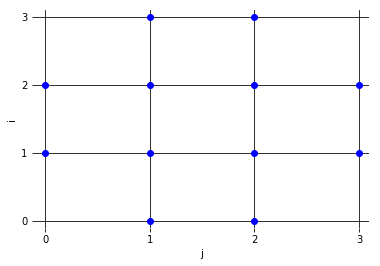

In [23]:
#this cell is to create graph used in markdown explanation

display(Markdown('# Combined Matrix for 4x4 mesh'))
plt.figure()
x = np.linspace(0,3,4)
y = np.linspace(0,3,4)
X,Y = np.meshgrid(x,y)
X = X.reshape(-1).tolist()
Y = Y.reshape(-1).tolist()
X = [i for j,i in enumerate(X) if j not in [0,3,12,15]]
Y = [i for j,i in enumerate(Y) if j not in [0,3,12,15]]
plt.plot(X,Y,'bo')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_yticks([0,1,2,3])
plt.grid(color = 'k')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlabel('j')
plt.ylabel('i')
plt.xlim(-0.1,3.1)
plt.ylim(-0.1,3.1)
plt.show()

$\begin{bmatrix}
1&0&0&-1&0&0&0&0&0&0&0&0\\
0&1&0&0&-1&0&0&0&0&0&0&0\\
0&0&1&-1&0&0&0&0&0&0&0&0\\
-r&0&-r&q&-r&0&0&-r&0&0&0&0\\
0&-r&0&-r&q&-r&0&0&-r&0&0&0\\
0&0&0&0&1&-1&0&0&0&0&0&0\\
0&0&0&0&0&0&1&-1&0&0&0&0\\
0&0&0&-r&0&0&-r&q&-r&0&-r&0\\
0&0&0&0&-r&0&0&-r&q&-r&0&-r\\
0&0&0&0&0&0&0&0&1&-1&0&0\\
0&0&0&0&0&0&0&1&0&0&-1&0\\
0&0&0&0&0&0&0&0&1&0&0&-1
\end{bmatrix}
\begin{bmatrix}
T_{0,1}\\
T_{0,2}\\
T_{1,0}\\
T_{1,1}\\
T_{1,2}\\
T_{1,3}\\
T_{2,0}\\
T_{2,1}\\
T_{2,2}\\
T_{2,3}\\
T_{3,1}\\
T_{3,2}
\end{bmatrix}_{n+1}
=
\begin{bmatrix}
0\\
0\\
0\\
T_{1,1}\\
T_{1,2}\\
0\\
0\\
T_{2,1}\\
T_{2,2}\\
0\\
0\\
0
\end{bmatrix}_{n}
$

### Identification of each matrix block
Notice that at the edge, the shape of $-r$ matrix become $4\times2$, and inner point for Neumann BC become $2\times4$

<img src = './Mat_2D_PDE.png'>

## Combine BC with GovEq + Exclude the corner

<font size = 2>
$\begin{bmatrix}
\vec A_{00} & \vec A_{01} &  &  &  &  & \\
\vec A_{10}  & \vec A_{11}  & \vec A_{12} &  &  &  & \\
  & \vec A_{21}  & \vec A_{22} & \vec A_{23} &  &  & \\
  &   & \ddots & \ddots & \ddots &  & \\
  &   &  & \vec A_{m-2,m-3} & \vec A_{m-2,m-2} & \vec A_{m-2,m-1} & \\
  &   &  &  & \vec A_{m-1,m-2} & \vec A_{m-1,m-1} & \vec A_{m-1,m}\\
  &   &  &  &  & \vec A_{m,m-1}  & \vec A_{m,m} \\  
\end{bmatrix}$
$\begin{bmatrix}
\vec T_{i,j = 0}\\
\vec T_{i,j = 1}\\
\vec T_{i,j = 2}\\
\vdots \\
\vec T_{i,j = m-2}\\
\vec T_{i,j = m-1}\\
\vec T_{i,j = m}\\
\end{bmatrix}$
$=$
$\begin{bmatrix}
\vec B_{i,j = 0}\\
\vec B_{i,j = 1}\\
\vec B_{i,j = 2}\\
\vdots \\
\vec B_{i,j = m-2}\\
\vec B_{i,j = m-1}\\
\vec B_{i,j = m}=[\vec 0]\\
\end{bmatrix}$
</font>

$\vec A_{00} =
\begin{bmatrix}
1 &      &      \\
 &     \ddots     &  \\
 &      &     1 \\
\end{bmatrix}
$
<p>
$\vec A_{00}$ is (N-2) x (N-2), to exclude the cornor points<br>
$\vec A_{00}$ is to be multiplied with $T_{i,0} = [T_{1,0},T_{2,0},\dots,T_{m-1,0}]^T$. Notice that $T_{0,0}$ and $T_{0,N}$ are not in $\vec{\vec{T}}$<p>
$\vec A_{01} =
\begin{bmatrix}
0&  -1& &  & &0 \\
0&   & -1&  & &0 \\
0&   & & \ddots  & & 0\\
0&   & & &-1 & 0\\
\end{bmatrix} = \vec A_{m,m-1}
$<p>
$\vec A_{01}$ is (N-2) x (N), The first and the last column is to exclude the connection to the corner points (the one above the corner point)<br>
$\vec A_{01}$ is to be multiplied with $T_{i,1} = [T_{0,1},T_{1,1},\dots,T_{m,1}]^T$. 

$\vec{A}_{10} =
\begin{bmatrix}
0&\cdots&0\\
-r& & \\
& \ddots & \\
& & -r\\
0&\cdots&0\\
\end{bmatrix} = \vec{A}_{m-1,m}
$

$\vec{\vec A}_{10}$ is N x (N-2), the first and the last row of zeros is for left and right Neumann condition where the bottom point is not involved.

$\vec{A}_{11}=
\begin{bmatrix}
1&-1\\
-r&q&-r\\
&-r&q&-r\\
&&\ddots&\ddots&\ddots\\
&&&-r&q&-r\\
&&&&1&-1\\
\end{bmatrix} = \vec{A}_{22} = \vec{A}_{22} = ... = \vec{A}_{m-1,m-1}
$

$\vec{\vec A}_{11}$ is NxN where the first and the last row is for BC of the left and right edge points

$\vec{A}_{21} =
\begin{bmatrix}
0&&\cdots&&0\\
&-r& && \\
\vdots&& \ddots & &\vdots\\
&& & -r&\\
0&&\cdots&&0\\
\end{bmatrix} = \vec{A}_{32} = \dots = \vec A_{m-1,m-2} = \vec A_{23} = \vec A_{34} = \dots = \vec A_{m-2,m-1}
$

# Implementation (2D-backward, square domain)

In [24]:
def remove_corner(TT):
    """take N x N array
    return (N-2 + N*(N-2) + N-2,1) array"""
    N = TT.shape[0]
    p1 = TT[0,1:N-1].reshape(-1,1)
    p2 = TT[1:N-1,:].reshape(-1,1)
    p3 = TT[N-1,1:N-1].reshape(-1,1)
    return(np.r_[p1,p2,p3])

def add_corner(TT):
    """reverse of remove_corner
    the value to be added at the corner is 0"""
    N = int((TT.shape[0]+4)**0.5)
    p1 = TT[:N-2]
    p2 = TT[N-2:N**2-4-(N-2)]
    p3 = TT[N**2-4-(N-2):]
    result = np.r_[[[0]],p1,[[0]],
                p2,[[0]],p3,[[0]]].reshape(N,N)
    return result

#def cal_heat_backward_2D():
#specify the number of points

def heat_2D_Backward(Nx = 30, Nt = 101):
    '''this is to solve a dimensionless problem only
    the space must be square'''
    Ny = Nx
    #initialize space and time grids
    x = np.linspace(0,1,Nx)
    y = np.linspace(0,1,Ny)
    t = np.linspace(0,0.15,Nt)
    #calculate dx and dt
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    dt = t[1]-t[0]
    #make empty output matrix (row = t, col = x)
    TT = np.empty([Nt,Nx,Ny])
    #specify the initial condition
    TT[0,:,:] = 0
    X,Y = np.meshgrid(x,y)
    IC = np.zeros([Nx,Nx])
    IC[((X>=0.45)&(X<=0.55))&((Y>=0.45)&(Y<=0.55))] = 1
    TT[0,:,:] = IC

    r = dt/dx**2
    #q in 2D is different than q in 1D
    q = 1+4*r
    #creating the matrix A (combined discretized eqs.)
    A_00 = np.eye(Nx-2,Nx-2)
    A_01 = np.c_[np.zeros([Nx-2,1]),np.eye(Nx-2,Nx-2,dtype = int)*-1,
                 np.zeros([Nx-2,1])]
    A_10 = A_01.T*r
    A_Nm1_N = A_10 #for A_{N-1,N}
    A_11_mid = [1] + [q for i in range(Nx-2)] +[-1]
    A_11_top = [-1] + [-r for i in range(Nx-2)]
    A_11_bot = [-r for i in range(Nx-2)] + [1]
    A_11 = sparse.diags([A_11_top, A_11_mid, A_11_bot], [1,0,-1])
    A_N_Nm1 = (A_01.astype(int)*-1).astype(float)
    A_NN = (A_00.astype(int)*-1).astype(float)
    A_12 = np.c_[np.zeros([Nx,1]),A_10,np.zeros([Nx,1])]

    A_11s = [A_11.todense() for i in range(Nx-2)]
    AA = scipy.linalg.block_diag(*A_11s)
    #creating the top part of the diagonal terms
    indptr = np.array(range(Nx-2))
    indices = np.array(range(1,Nx-2))
    data = np.array([A_12 for i in range(Nx-3)])
    A_12_top = np.array(sparse.bsr_matrix((data,indices,indptr),
                  shape=(Nx*(Nx-3),Nx*(Nx-2))).todense())

    fill_size = AA.shape[0]-A_12_top.shape[0]
    fill_arr = np.zeros((fill_size,AA.shape[1]))
    A_12_same_shape = np.r_[A_12_top,fill_arr]
    AA_top_bot = A_12_same_shape + AA + A_12_same_shape.T
    _A_ = scipy.linalg.block_diag(A_00,AA_top_bot,A_NN)
    #fill non-square matrix in
    _A_[0:Nx-2,Nx-2:2*Nx-2] = A_01
    _A_[Nx-2:2*Nx-2,0:Nx-2] = A_10
    _A_[Nx**2-4-(Nx-2):Nx**2-4,Nx**2-4-(2*Nx-2):Nx**2-4-(Nx-2)] = A_N_Nm1
    _A_[Nx**2-4-(2*Nx-2):Nx**2-4-(Nx-2),Nx**2-4-(Nx-2):Nx**2-4] = A_Nm1_N

    b0_idx = np.array([[i*Nx,i*Nx+Nx-1] 
                for i in range(Nx-2)]).reshape(-1) + Nx-2
    b0_idx = np.r_[np.arange(Nx-2),b0_idx,np.arange(Nx-2)+Nx**2-4-Nx+2]
    _A_super = sparse.linalg.splu(sparse.csc_matrix(_A_))
    for j in range(1,Nt):
        _B_ = remove_corner(TT[j-1,:,:])
        _B_[b0_idx,0] = 0
        tslice_img = _A_super.solve(_B_)
        TT[j,:,:] = add_corner(tslice_img)
    return TT,dx,dy,dt
TT,dx,dy,dt = heat_2D_Backward()

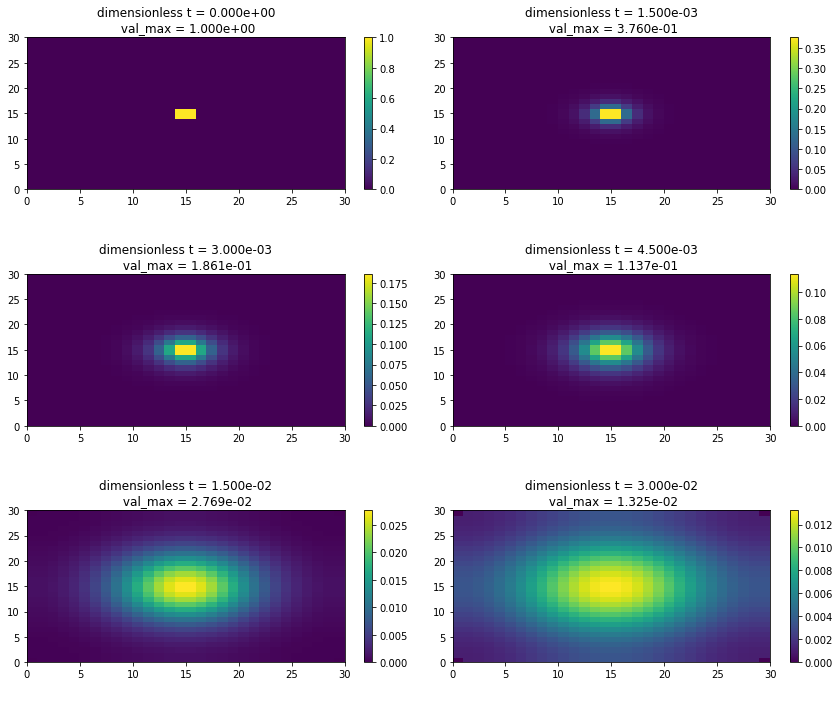

In [25]:
fig = plt.figure(figsize = (12,10))

plt.subplot(321)
plt.pcolor(TT[0,:,:])
plt.title('dimensionless t = {:.3e}\n val_max = {:.3e}'.format(
    dt*0,TT[0,:,:].max()))
plt.colorbar()
plt.xlabel('\n')

plt.subplot(322)
plt.pcolor(TT[1,:,:])
plt.title('dimensionless t = {:.3e}\n val_max = {:.3e}'.format(
    dt*1,TT[1,:,:].max()))
plt.colorbar()
plt.xlabel('\n')

plt.subplot(323)
plt.pcolor(TT[2,:,:])
plt.title('dimensionless t = {:.3e}\n val_max = {:.3e}'.format(
    dt*2,TT[2,:,:].max()))
plt.colorbar()
plt.xlabel('\n')

plt.subplot(324)
plt.pcolor(TT[3,:,:])
plt.title('dimensionless t = {:.3e}\n val_max = {:.3e}'.format(
    dt*3,TT[3,:,:].max()))
plt.colorbar()
plt.xlabel('\n')

plt.subplot(325)
plt.pcolor(TT[10,:,:])
plt.title('dimensionless t = {:.3e}\n val_max = {:.3e}'.format(
    dt*10,TT[10,:,:].max()))
plt.colorbar()
plt.xlabel('\n')

plt.subplot(326)
plt.pcolor(TT[20,:,:])
plt.title('dimensionless t = {:.3e}\n val_max = {:.3e}'.format(
    dt*20,TT[20,:,:].max()))
plt.colorbar()
plt.xlabel('\n')

plt.tight_layout()
plt.show()

<font size = 3>
Realize that, even for 1 time step,
roughly 4 cells around it get impact by the initial condition already
</font>

In [26]:
#Use animation one at a time

# # create the function that will do the plotting, where curr is the current frame
# %matplotlib notebook
# def update(curr):
#     #Code is modified from Christopher Brooks, University of Michigan
#     #Python plotting, coursera
#     plt.cla()
#     im = plt.pcolor(TT[curr,:,:])
#     plt.clim(0,1)
#     plt.gca().set_title('2D diffusion')
#     plt.gca().set_ylabel('y')
#     plt.gca().set_xlabel('x')
#     plt.annotate('n = {}'.format(curr), [3,27])
# fig = plt.figure(figsize=(10,8))
# plt.pcolor(TT[0,:,:])
# plt.colorbar()
# a1 = animation.FuncAnimation(fig, update, interval=300, frames = 100)
# a1.save('L11_absolute_T.mp4',fps=10, dpi=100)
# plt.show()

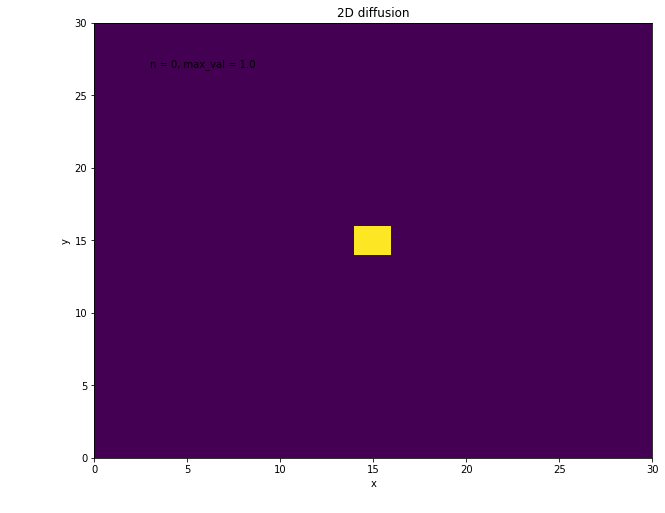

In [27]:
def update2(curr):
    #Code is modified from Christopher Brooks, University of Michigan
    #Python plotting, coursera
    plt.cla()
    im = plt.pcolor(TT[curr,:,:])
    plt.clim(0,1)
    vmax = np.max(TT[curr,:,:])
    vmin = np.min(TT[curr,:,:])
    plt.gca().set_title('2D diffusion')
    plt.gca().set_ylabel('y')
    plt.gca().set_xlabel('x')
    plt.annotate('n = {}, max_val = {}'.format(curr,vmax), [3,27])
    im.set_clim(vmin,vmax)
fig = plt.figure(figsize=(10,8))
plt.pcolor(TT[0,:,:])
a2 = animation.FuncAnimation(fig, update2, interval=300, frames = 100)
a2.save('L11_relative_T.mp4',fps=10, dpi=100)
plt.show()

In [28]:
#This is the code to visualize numpy array, use to debug program
# plt.figure(figsize=(30,24))
# plt.pcolor(_A_,cmap = 'jet')
# plt.gca().invert_yaxis()
# plt.yticks(np.linspace(0,120,13))
# plt.xticks(np.linspace(0,120,13))
# plt.colorbar()
# plt.grid()
# plt.show()

In [29]:
# plt.figure(figsize=(12,8))
# plt.pcolor(_A_,cmap='Greens')
# plt.grid()
# plt.colorbar()
# plt.gca().invert_yaxis()
# plt.ylabel('i')
# plt.xlabel('j')
# plt.show()

# <font color = 'blue'> First Tuitorial of FEniCS Project </font>
# <font color = 'magenta'> Use FEniCS as a blackbox PDE solver </font>
The section below shows the first example in FEniCS project. This is just a first look at FEniCS project. Your computer (Windows) probably won't run any of the code below. Yet, you <font color = 'red'> need </font> to understand the concept.
## Finics use Finite Element Method (FEM) to solve PDE
https://fenicsproject.org/pub/tutorial/html/._ftut1004.html<br>
https://fenicsproject.org/qa/7316/print-values-numerical-solution-neumann-boundary-problem<br>
https://fenicsproject.org/qa/6450/get-field-value-at-mesh-vertex
<p><font size = 4>
$-\nabla^2u(x) = -6$
<p>$-\dfrac{\partial^2u}{\partial x^2} - \dfrac{\partial^2u}{\partial y^2} = -6$
<p>BC: $1 + x^2 + 2 * y^2$
<p>$\Omega = [0,1]\times[0,1]$
</font>

# FEM Introduction (Dirichlet BC)
Dirichlet Boundary condition means the values at the boundary are known
<font size = 3><p><p>
$\begin{align*}
-\Delta u(\mathbf x) & = f(\mathbf x),\quad\:\:\: \mathbf x \: \text{in} \: \Omega \\
u(\mathbf x) & = u_D(\mathbf x), \quad \mathbf x \: \text{on} \: \partial \Omega
\end{align*}$ <p>
$\Delta$ is Laplace operator (or $\nabla^2$) <p>
$u(\mathbf x)$ is unknown function<p>
$\Omega$ is spatial domain<p>
$\partial\Omega$ is the boundary of $\Omega$<p>
First step in FEM is ti turning PDE into a variational problem by multiplying the PDE by a function $v$, integrating the resulting equation over the domain $\Omega$, and perform integration by parts of terms with second-order derivatives.<p>
$v$ is a test function<p>
$-\Delta u(\mathbf x) = f(\mathbf x)$<p>
By transforming PDE into variational problem, we get,<p>
$-\int_\Omega(\Delta u)vdx=\int_\Omega f v dx$<p>
From integration by parts, we have<p>
$\nabla \cdot \big(a\vec b\big) = a\big(\nabla \cdot \vec b\big) + \vec b \cdot \big(\nabla a\big)$<p>
Therefore,<p>
$\nabla \cdot \big(v (\nabla u) \big) = v(\nabla^2u) + (\nabla u)\cdot (\nabla v)$<p>
Rearranging, we have<p>
$-v(\nabla^2u) = (\nabla u)\cdot (\nabla v) - \nabla \cdot \big(v (\nabla u) \big)$<p>
or<p>
$-\int_\Omega v(\nabla^2u)dx = \int_\Omega \nabla u\cdot \nabla v dx- \int_\Omega \nabla \cdot (v \nabla u) dx$<p>
From divergence theorem (change from volume to surface integration),<p>
$\iiint_\Omega (\nabla \cdot \vec F) \, dV = \oint_{\partial\Omega} ( \vec F \cdot \hat n ) \, dS$<p>
Thus, we have<p>

$-\int_\Omega v(\nabla^2u)dx = \int_\Omega \nabla u\cdot \nabla v dx- \oint_{\partial \Omega} (v \nabla u)\cdot \hat n dS$<p>
$\nabla u \cdot \hat n = \dfrac{\partial u}{\partial n}$ &nbsp; n is the unit normal vector pointing outward, so we have<p>
$-\int_\Omega v(\nabla^2u)dx = \int_\Omega \nabla u\cdot \nabla v dx- \oint_{\partial \Omega} \frac{\partial u}{\partial n} v dS$<p>
</font>
<p>http://sfepy.org/doc-devel/solving_pdes_by_fem.html#sec-solving-pdes-fem
<br>https://en.wikipedia.org/wiki/Integration_by_parts

<font size = 3>
At the boundary, we have<p><br>
$u(\mathbf x) = u_D(\mathbf x)$<p>
By requring $v$ to vanish (be zero) at $\partial \Omega$, we have<p>
$\int_\Omega \nabla u\cdot \nabla v dx = \int_\Omega f v dx \quad\text{  This is the weak form or variational form of the BVP}$<p>
This equation should hold for all test function $v$ in some suitable space $\hat V$ (so-called test space). The solution $u$  is in function space $V$ (so-called trial space). The test space $\hat V$ and the trial space can be defined as<p>
$V = \{ v\in H^1(\Omega): v = u_D \:\text{on}\: \partial \Omega \}$<p>
$\hat V = \{ v \in H^1(\Omega): v = 0 \:\text{on}\: \partial \Omega \}$<p>
$H^1(\Omega)$ is the Sobolev space containing $v$ such that $v^2$ and $|\nabla v|^2$ have finite integrals over $\Omega$ (functions are continuous). Sobolev space $H^1(\Omega)$ allows functions with discontinuous derivatives.<p>
After obtaining the variational form of $\int_\Omega \nabla u\cdot \nabla v dx = \int_\Omega f v dx \:\: \forall v \in \hat V$ Then, FEniCS can solve it by using <p>
```
a = fn.dot(fn.grad(u), fn.grad(v))*fn.dx
L = f*v*fn.dx
u = fn.Function(V)
fn.solve(a == L, u, bc)
```
</font>

## FEniCS code implementation
For full explanation, please see<p>
https://fenicsproject.org/pub/tutorial/html/._ftut1004.html

In [30]:
mesh = fn.UnitSquareMesh(8,8)

In [31]:
mesh

In [32]:
V = fn.FunctionSpace(mesh, 'P', 1)

In [33]:
V

FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), FiniteElement('Lagrange', triangle, 1))

In [34]:
u_D = fn.Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

In [35]:
u_D

In [36]:
def boundary(x, on_boundary):
    return on_boundary

In [37]:
bc = fn.DirichletBC(V, u_D, boundary)
bc

<dolfin.fem.bcs.DirichletBC; proxy of <Swig Object of type 'std::shared_ptr< dolfin::DirichletBC > *' at 0x7f56b0ad8a80> >

In [38]:
# Define variational problem
u = fn.TrialFunction(V)
v = fn.TestFunction(V)
f = fn.Constant(-6.0)
a = fn.dot(fn.grad(u), fn.grad(v))*fn.dx
L = f*v*fn.dx

In [39]:
u

In [40]:
v

In [41]:
f

In [42]:
a

Form([Integral(Dot(Grad(Argument(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), FiniteElement('Lagrange', triangle, 1)), 1, None)), Grad(Argument(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), FiniteElement('Lagrange', triangle, 1)), 0, None))), 'cell', Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), 'everywhere', {}, None)])

In [43]:
L

Form([Integral(Product(Argument(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), FiniteElement('Lagrange', triangle, 1)), 0, None), Coefficient(FunctionSpace(None, FiniteElement('Real', None, 0)), 6)), 'cell', Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), 'everywhere', {}, None)])

In [44]:
# Compute solution
u = fn.Function(V)
fn.solve(a == L, u, bc)

In [45]:
u

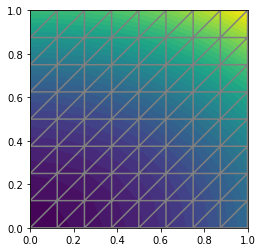

In [46]:
fn.plot(u)
fn.plot(mesh)
fn.interactive()
plt.show()

In [47]:
# Save solution to file in VTK format
vtkfile = fn.File('poisson/solution.pvd')
vtkfile << u

In [48]:
#manually extracting the data
X = []; Y = []; U = []
for v in fn.vertices(mesh):
    x = v.point().x()
    y = v.point().y()
    X.append(x)
    Y.append(y)
    U.append(u(x,y))
U = np.array(U).reshape(9,9)
X = np.array(X).reshape(9,9)
Y = np.array(Y).reshape(9,9)

In [49]:
U

array([[ 1.      ,  1.015625,  1.0625  ,  1.140625,  1.25    ,  1.390625,
         1.5625  ,  1.765625,  2.      ],
       [ 1.03125 ,  1.046875,  1.09375 ,  1.171875,  1.28125 ,  1.421875,
         1.59375 ,  1.796875,  2.03125 ],
       [ 1.125   ,  1.140625,  1.1875  ,  1.265625,  1.375   ,  1.515625,
         1.6875  ,  1.890625,  2.125   ],
       [ 1.28125 ,  1.296875,  1.34375 ,  1.421875,  1.53125 ,  1.671875,
         1.84375 ,  2.046875,  2.28125 ],
       [ 1.5     ,  1.515625,  1.5625  ,  1.640625,  1.75    ,  1.890625,
         2.0625  ,  2.265625,  2.5     ],
       [ 1.78125 ,  1.796875,  1.84375 ,  1.921875,  2.03125 ,  2.171875,
         2.34375 ,  2.546875,  2.78125 ],
       [ 2.125   ,  2.140625,  2.1875  ,  2.265625,  2.375   ,  2.515625,
         2.6875  ,  2.890625,  3.125   ],
       [ 2.53125 ,  2.546875,  2.59375 ,  2.671875,  2.78125 ,  2.921875,
         3.09375 ,  3.296875,  3.53125 ],
       [ 3.      ,  3.015625,  3.0625  ,  3.140625,  3.25    ,  3.390625

In [50]:
X

array([[ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ]])

In [51]:
Y

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,
         0.125],
       [ 0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,
         0.25 ],
       [ 0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
         0.375],
       [ 0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,
         0.5  ],
       [ 0.625,  0.625,  0.625,  0.625,  0.625,  0.625,  0.625,  0.625,
         0.625],
       [ 0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,
         0.75 ],
       [ 0.875,  0.875,  0.875,  0.875,  0.875,  0.875,  0.875,  0.875,
         0.875],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ]])

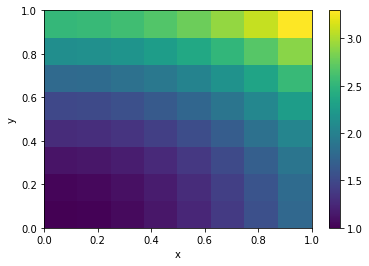

In [52]:
plt.pcolor(X,Y,U)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Checking BC at y = 0

In [53]:
x_bc = np.linspace(0,1,20)
y_bc = np.array([1])
u_bc = 1 + x_bc**2 + 2 * y_bc**2
u_bc

array([ 3.        ,  3.00277008,  3.01108033,  3.02493075,  3.04432133,
        3.06925208,  3.09972299,  3.13573407,  3.17728532,  3.22437673,
        3.27700831,  3.33518006,  3.39889197,  3.46814404,  3.54293629,
        3.6232687 ,  3.70914127,  3.80055402,  3.89750693,  4.        ])

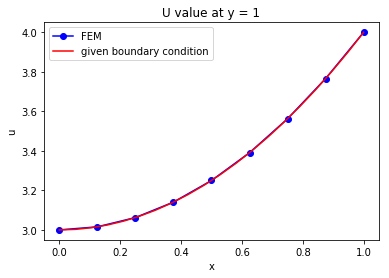

In [54]:
plt.plot(X[0],U[-1,:],'-ob',label = 'FEM')
plt.plot(x_bc,u_bc,'r', label = 'given boundary condition')
plt.title('U value at y = 1')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.show()

# Checking BC at x = 1

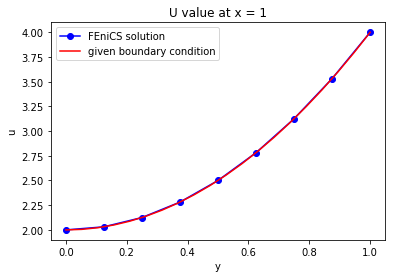

In [55]:
x_bc = np.array([1])
y_bc = np.linspace(0,1,20)
u_bc = 1 + x_bc**2 + 2 * y_bc**2

plt.plot(Y[:,0],U[:,-1],'-ob',label = 'FEniCS solution')
plt.plot(y_bc,u_bc,'r', label = 'given boundary condition')
plt.title('U value at x = 1')
plt.legend()
plt.xlabel('y')
plt.ylabel('u')
plt.show()

# Check if PDE is satisfied or not at point x = 0.5, y = 0

In [56]:
X[0,4]

0.5

In [57]:
Y[0,4]

0.0

In [58]:
X

array([[ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ],
       [ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ]])

In [59]:
Y

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,
         0.125],
       [ 0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,  0.25 ,
         0.25 ],
       [ 0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,  0.375,
         0.375],
       [ 0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,
         0.5  ],
       [ 0.625,  0.625,  0.625,  0.625,  0.625,  0.625,  0.625,  0.625,
         0.625],
       [ 0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,  0.75 ,
         0.75 ],
       [ 0.875,  0.875,  0.875,  0.875,  0.875,  0.875,  0.875,  0.875,
         0.875],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ]])

### Estimate $\dfrac{\partial^2 u}{\partial x^2}$ Using Centrail and Forward Difference <p> With 9 Points
https://en.wikipedia.org/wiki/Finite_difference_coefficient

In [60]:
cf_d2C = np.array([-1/560, 8/315, -1/5, 8/5,
        -205/72, 8/5, -1/5, 8/315, -1/560])
cf_d2C

array([ -1.78571429e-03,   2.53968254e-02,  -2.00000000e-01,
         1.60000000e+00,  -2.84722222e+00,   1.60000000e+00,
        -2.00000000e-01,   2.53968254e-02,  -1.78571429e-03])

In [61]:
dx = X[0,1]-X[0,0]
dx

0.125

In [62]:
first_term = U[0].dot(cf_d2C)/dx**2
first_term

1.9999999999999432

### Estimate $\dfrac{\partial^2u}{\partial y^2}$ with 8 points forward scheme

In [63]:
cf_d2F = np.array([469/90,-223/10,879/20,
            -949/18,41,-201/10,1019/180,-7/10])

In [64]:
second_term = U[0:8,4].dot(cf_d2F)/dx**2
second_term
#dx = dy in our case

4.0000000000027285

In [65]:
- first_term - second_term

-6.0000000000026716

In [66]:
print('almost -6 as required by the PDE!')
display(Math(r'''\text{PDE:}\:\:
    -\dfrac{\partial^2u}{\partial x^2} 
    - \dfrac{\partial^2u}{\partial y^2} = -6'''))


almost -6 as required by the PDE!


<IPython.core.display.Math object>